## Problem statement

In this capstone project, you are going to analyze customer’s purchase data set and build a machine learning algorithm to detect fraud purchases. And also you are going to perform customer segmentation

## Data Description:
Every row in this dataset contains information about purchases from multiple customers. Along with purchase details, we also have customer basic details like gender, date of birth etc. Individual column description as follows

- User_id: Customer unique id
- Signup_time: Date & Time at which the customer signup in the platform
- Purchase_time: The latest purchase date & time from a customer
- Purchase_value: Total purchase amount
- Device_id: Unique device ID from which purchase was done
- Source: Medium through which customers reached the platform
- Browser: Browser used while purchasing
- IP_address: IP Address from which purchase was done
- Class: 1 = Target class; Fraud transaction; 0=Regular transaction
- Category: Type of product purchased
- Dob: Date of birth of the customer


In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, auc, roc_curve
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [2]:
dt=pd.read_csv('Purchase_Fraud_Data.csv')

In [3]:
dt_new=pd.read_csv('Purchase_Fraud_Data.csv')

In [4]:
dt.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,ip_address,class,category,dob
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,65278,QVPSPJUOCKZAR,SEO,Chrome,M,7.327584e+08,0,home_essentials,22-2-1976
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,96399,EOGFQPIZPYXFZ,Ads,Chrome,F,3.503114e+08,0,apparels,2-1-1962
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,57296,YSSKYOSJHPPLJ,SEO,Opera,M,2.621474e+09,1,electronics,5-3-1962
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,43650,ATGTXKYKUDUQN,SEO,Safari,M,3.840542e+09,0,health_care,3-7-1974
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,45016,NAUITBZFJKHWW,Ads,Safari,M,4.155831e+08,0,home_essentials,25-8-1970


## Exploratory Data Analysis

### 1.Summarize numerical, categorical and date columns separately and list down your inferences

In [5]:
dt.dtypes

user_id             int64
signup_time        object
purchase_time      object
purchase_value      int64
device_id          object
source             object
browser            object
sex                object
ip_address        float64
class               int64
category           object
dob                object
dtype: object

###### Inferences

> User Id,Purchase value,Ip-Address and class are numeric column <br/>
> Sign up time,purchase time,device id,Source,browser,sex,category are categorical columns <br/>
> dob is date column

### 2. Identify and perform missing value treatment using appropriate techniques

In [6]:
dt.isnull().sum()

user_id              0
signup_time          0
purchase_time        0
purchase_value       0
device_id            0
source               0
browser              0
sex               4927
ip_address           0
class                0
category             0
dob               4924
dtype: int64

In [7]:
dt.shape

(151112, 12)

In [8]:
dt['sex'].mode()[0]

'M'

In [9]:
dt['dob'].mode()[0]

'24-7-1982'

###### Calculating the percentage of the missing value

In [10]:
percent_missing = dt.isnull().sum() * 100 / len(dt)
missing_value_df = pd.DataFrame({'column_name': dt.columns,
                                 'percent_missing': percent_missing})

In [11]:
missing_value_df

,column_name,percent_missing
user_id,user_id,0.000000
signup_time,signup_time,0.000000
purchase_time,purchase_time,0.000000
purchase_value,purchase_value,0.000000
device_id,device_id,0.000000
source,source,0.000000
browser,browser,0.000000
sex,sex,3.260496
ip_address,ip_address,0.000000
class,class,0.000000


###### Inferences

> Only 3% of the data is missing hence we can easily drop those rows  <br/>


In [12]:
dt = dt.dropna()

In [13]:
dt_new=dt_new.dropna()

In [14]:
dt.isnull().sum()

user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
ip_address        0
class             0
category          0
dob               0
dtype: int64

### 3.Univariate analysis: For each column perform appropriate univariate analysis. (i.e. perform distribution analysis on numerical columns and frequency analysis on categorical columns)


In [15]:
dt[['purchase_value','ip_address']].describe()

,purchase_value,ip_address
count,141404.000000,1.414040e+05
mean,50501.754717,2.152870e+09
std,28535.664903,1.248164e+09
min,1016.000000,5.209350e+04
25%,25891.250000,1.086074e+09
50%,50453.000000,2.156867e+09
75%,75291.250000,3.243800e+09
max,100092.000000,4.294850e+09


In [16]:
dt.pivot_table(index='device_id',values='class',aggfunc='sum')

,class
device_id,
AAALBGNHHVMKG,0
AAAWIHVCQELTP,0
AAAXJHWCLISKY,0
AAAXXOZJRZRAO,10
AABFGRPBQHWFQ,0
AABGCAPIYUWNC,0
AABJEESQPJHDQ,0
AABNLBQBKMWRG,0
AABOMYDURXEQT,0


In [17]:
tab=pd.crosstab(index=dt['device_id'],columns=dt['class'])

In [18]:
print(tab)

class          0   1
device_id           
AAALBGNHHVMKG  1   0
AAAWIHVCQELTP  1   0
AAAXJHWCLISKY  1   0
AAAXXOZJRZRAO  1  10
AABFGRPBQHWFQ  1   0
AABGCAPIYUWNC  1   0
AABJEESQPJHDQ  1   0
AABNLBQBKMWRG  1   0
AABOMYDURXEQT  1   0
AABOOVEJUXMKC  1   0
AABOYHXAZBTLZ  1   0
AABQZGLRSEYGR  1   0
AABZHGGYUMVEQ  1   0
AACBIMMVQIFWW  1   0
AACEEKSUWDCSU  1   0
AACIHTWABTEMZ  1   0
AACOSZDJHOJIZ  1   0
AACRSKFMHVMCE  1   0
AACUHRZNDEHGI  1   0
AACYYBUHPLDWT  1   0
AADEPZVZDTXGA  1   0
AADGMPYOPXXCX  0   1
AADHZIOUTNGHW  1   0
AADMHINGHICLN  1   0
AADOZLHNCJMMS  1   0
AADSJJXNALPUV  1   0
AADTALFGPPJOP  1   0
AADWLKVTMKVDI  1   0
AADZHIAGRGWXX  1   0
AAEJIBCSAFDIZ  1   0
...           ..  ..
ZZWIYGUQHUOYP  1   0
ZZWJDOXKQKJPC  1   0
ZZWTSKJKTTRSV  1   0
ZZWVTGCQMGXVP  1   0
ZZWWMXZPNFTMQ  1   0
ZZWWUUNHDFOBP  1   0
ZZWYWEUXIOJOC  1   0
ZZXBLOMHSUWLU  1   0
ZZXEKRHNFHFZP  1   0
ZZXFLVDKVVLHQ  1   0
ZZXHOIVRZOTMT  1   0
ZZXKLCSAUENBL  1   0
ZZXLGBVKXUGRH  1   0
ZZXTJKEXPFCIS  1   0
ZZXVNRXEUGTAH

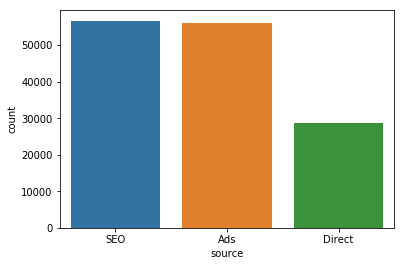

In [19]:
sns.countplot(dt.source)

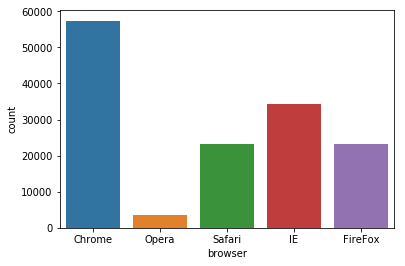

In [60]:
sns.countplot(dt.browser)

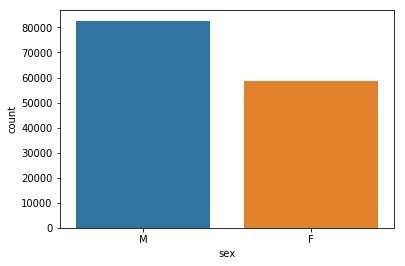

In [61]:
sns.countplot(dt.sex)

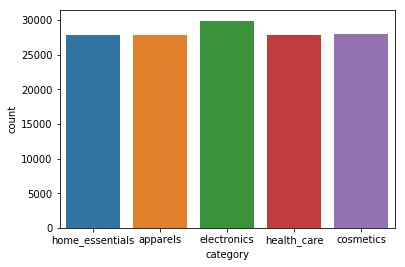

In [62]:
sns.countplot(dt.category)

In [63]:
dt.corr()

,user_id,purchase_value,ip_address,class
user_id,1.000000,0.002933,-0.003462,0.002490
purchase_value,0.002933,1.000000,-0.001130,0.003700
ip_address,-0.003462,-0.001130,1.000000,-0.004706
class,0.002490,0.003700,-0.004706,1.000000


### 4.Multivariate analysis: Take combinations of multiple columns and identify the relationship between them


> Categorical vs numerical columns – bar charts, boxplots  <br/>

In [64]:
dt['device_id'].unique()

array(['QVPSPJUOCKZAR', 'EOGFQPIZPYXFZ', 'YSSKYOSJHPPLJ', ...,
       'LYSFABUCPCGBA', 'MEQHCSJUBRBFE', 'ZINIADFCLHYPG'], dtype=object)

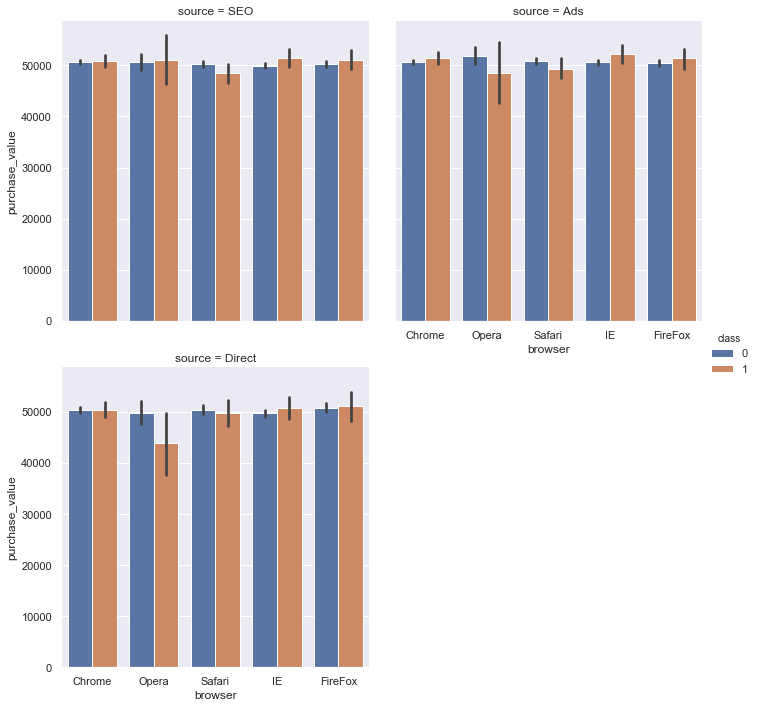

In [65]:
sns.set(style='darkgrid', font_scale=1.0) 
sns.catplot(x='browser',
            y='purchase_value',hue='class',
            col='source',
            col_wrap=2,
            data=dt,
            kind='bar')


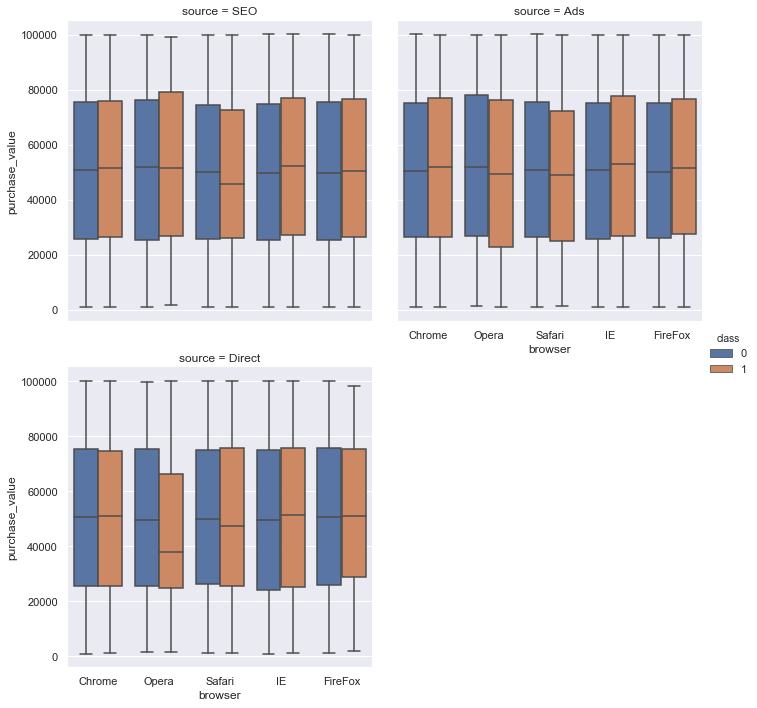

In [66]:
sns.set(style='darkgrid', font_scale=1.0) 
sns.catplot(x='browser',
            y='purchase_value',hue='class',
            col='source',
            col_wrap=2,
            data=dt,
            kind='box')

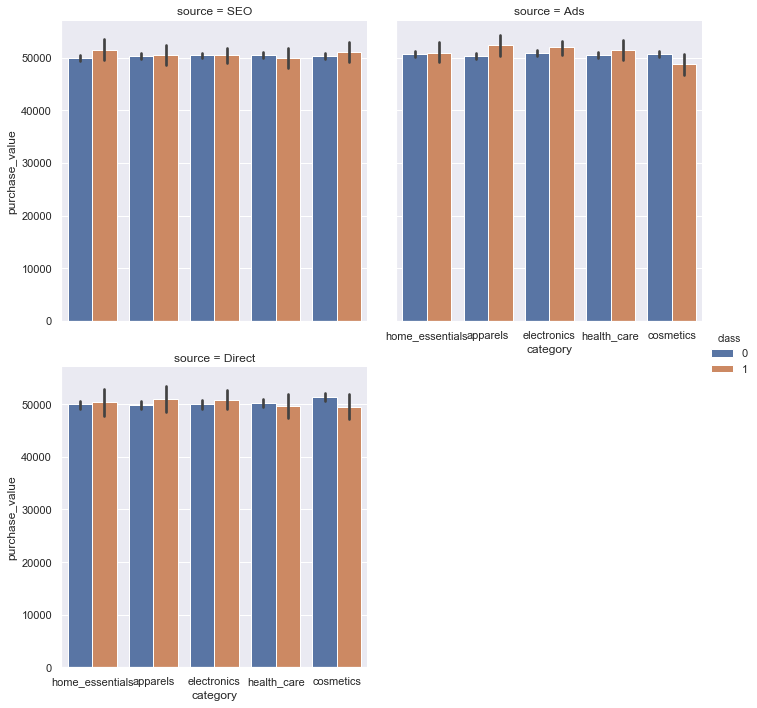

In [67]:
sns.set(style='darkgrid', font_scale=1.0) 
sns.catplot(x='category',
            y='purchase_value',hue='class',
            col='source',
            col_wrap=2,
            data=dt,
            kind='bar')

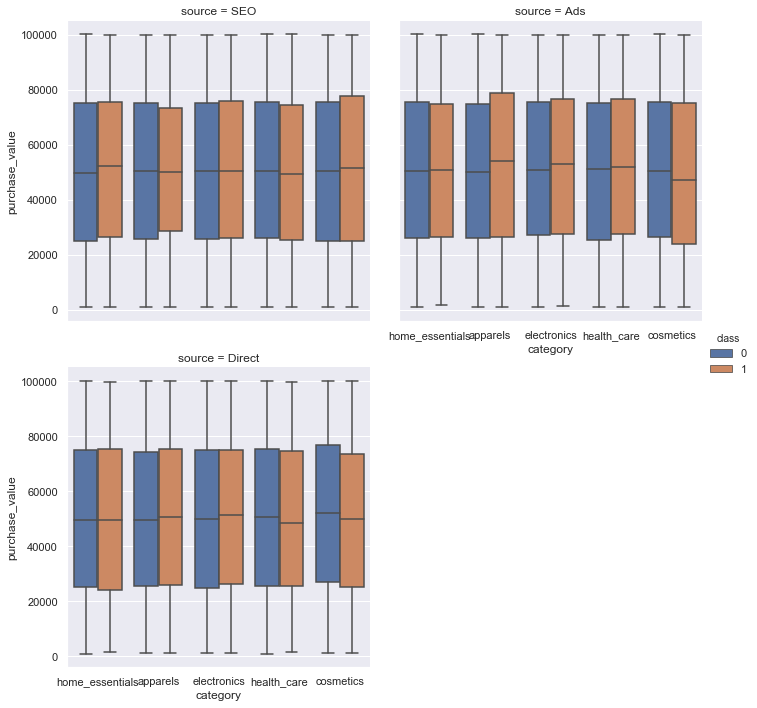

In [68]:
sns.set(style='darkgrid', font_scale=1.0) 
sns.catplot(x='category',
            y='purchase_value',hue='class',
            col='source',
            col_wrap=2,
            data=dt,
            kind='box')


> Numerical vs numerical columns – scatter plot  <br/>

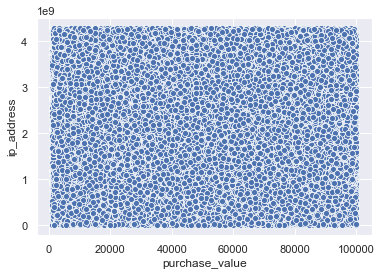

In [69]:
sns.scatterplot(x='purchase_value',y='ip_address',data=dt)

> Categorical vs multiple numerical columns – scatter plot </br>

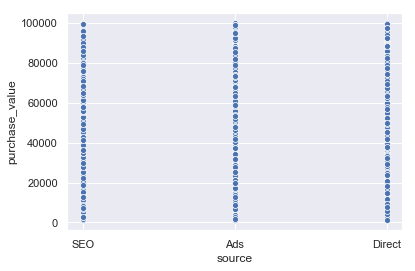

In [70]:
sns.scatterplot(x='source',y='purchase_value',data=dt)

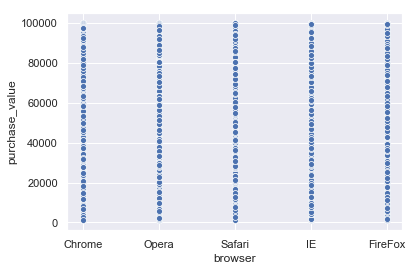

In [71]:
sns.scatterplot(x='browser',y='purchase_value',data=dt)

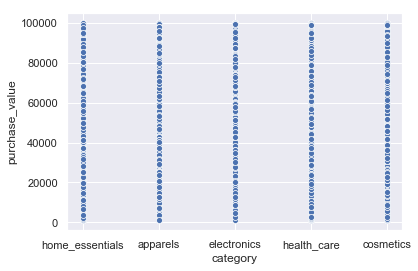

In [72]:
sns.scatterplot(x='category',y='purchase_value',data=dt)

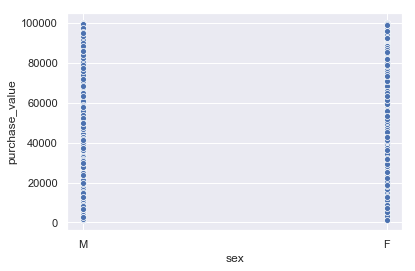

In [73]:
sns.scatterplot(x='sex',y='purchase_value',data=dt)

> Correlation matrix </br>

In [20]:
dt.corr()

,user_id,purchase_value,ip_address,class
user_id,1.000000,0.002933,-0.003462,0.002490
purchase_value,0.002933,1.000000,-0.001130,0.003700
ip_address,-0.003462,-0.001130,1.000000,-0.004706
class,0.002490,0.003700,-0.004706,1.000000


In [21]:
dt.describe()

,user_id,purchase_value,ip_address,class
count,141404.000000,141404.000000,1.414040e+05,141404.000000
mean,200046.960871,50501.754717,2.152870e+09,0.093632
std,115323.445394,28535.664903,1.248164e+09,0.291318
min,2.000000,1016.000000,5.209350e+04,0.000000
25%,100468.000000,25891.250000,1.086074e+09,0.000000
50%,199880.000000,50453.000000,2.156867e+09,0.000000
75%,299740.250000,75291.250000,3.243800e+09,0.000000
max,400000.000000,100092.000000,4.294850e+09,1.000000


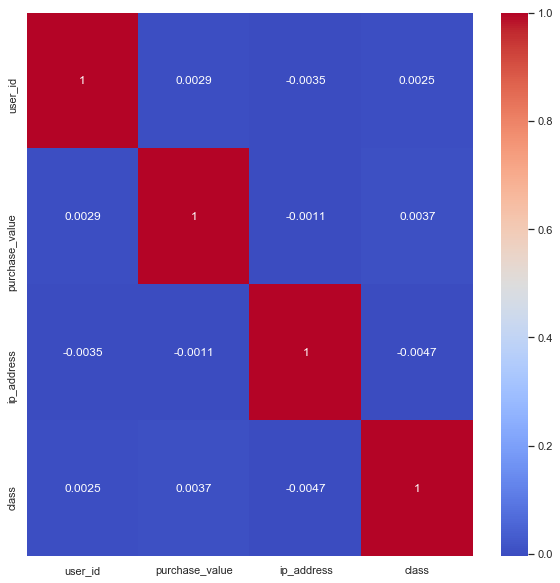

In [134]:
plt.figure(figsize=(10,10))
sns.heatmap(dt.corr(),annot=True,cmap='coolwarm')

In [15]:
dt_new.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,ip_address,class,category,dob
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,65278,QVPSPJUOCKZAR,SEO,Chrome,M,7.327584e+08,0,home_essentials,22-2-1976
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,96399,EOGFQPIZPYXFZ,Ads,Chrome,F,3.503114e+08,0,apparels,2-1-1962
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,57296,YSSKYOSJHPPLJ,SEO,Opera,M,2.621474e+09,1,electronics,5-3-1962
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,43650,ATGTXKYKUDUQN,SEO,Safari,M,3.840542e+09,0,health_care,3-7-1974
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,45016,NAUITBZFJKHWW,Ads,Safari,M,4.155831e+08,0,home_essentials,25-8-1970


## Base Model for Benchmark

> Make sure you temporarily ignore the date columns and id columns

In [22]:
dt_new.drop(['user_id','signup_time','purchase_time','dob','ip_address'],axis=1,inplace=True)

In [23]:
dt_new.head()


,purchase_value,device_id,source,browser,sex,class,category
0,65278,QVPSPJUOCKZAR,SEO,Chrome,M,0,home_essentials
1,96399,EOGFQPIZPYXFZ,Ads,Chrome,F,0,apparels
2,57296,YSSKYOSJHPPLJ,SEO,Opera,M,1,electronics
3,43650,ATGTXKYKUDUQN,SEO,Safari,M,0,health_care
4,45016,NAUITBZFJKHWW,Ads,Safari,M,0,home_essentials


In [24]:
dt_new.isnull().sum()

purchase_value    0
device_id         0
source            0
browser           0
sex               0
class             0
category          0
dtype: int64

> Convert all the input columns to numerical columns using one hot encoding

In [25]:
xyz=pd.get_dummies(dt_new['source'],prefix='source',drop_first=True)
dt_new=pd.concat([dt_new,xyz],axis=1)
dt_new.drop('source',axis=1,inplace=True)
dt_new.head()

,purchase_value,device_id,browser,sex,class,category,source_Direct,source_SEO
0,65278,QVPSPJUOCKZAR,Chrome,M,0,home_essentials,0,1
1,96399,EOGFQPIZPYXFZ,Chrome,F,0,apparels,0,0
2,57296,YSSKYOSJHPPLJ,Opera,M,1,electronics,0,1
3,43650,ATGTXKYKUDUQN,Safari,M,0,health_care,0,1
4,45016,NAUITBZFJKHWW,Safari,M,0,home_essentials,0,0


In [26]:
xyz=pd.get_dummies(dt_new['browser'],prefix='browser',drop_first=True)
dt_new=pd.concat([dt_new,xyz],axis=1)
dt_new.drop('browser',axis=1,inplace=True)
dt_new.head()

,purchase_value,device_id,sex,class,category,source_Direct,source_SEO,browser_FireFox,browser_IE,browser_Opera,browser_Safari
0,65278,QVPSPJUOCKZAR,M,0,home_essentials,0,1,0,0,0,0
1,96399,EOGFQPIZPYXFZ,F,0,apparels,0,0,0,0,0,0
2,57296,YSSKYOSJHPPLJ,M,1,electronics,0,1,0,0,1,0
3,43650,ATGTXKYKUDUQN,M,0,health_care,0,1,0,0,0,1
4,45016,NAUITBZFJKHWW,M,0,home_essentials,0,0,0,0,0,1


In [27]:
xyz=pd.get_dummies(dt_new['sex'],prefix='sex',drop_first=True)
dt_new=pd.concat([dt_new,xyz],axis=1)
dt_new.drop('sex',axis=1,inplace=True)
dt_new.head()

,purchase_value,device_id,class,category,source_Direct,source_SEO,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_M
0,65278,QVPSPJUOCKZAR,0,home_essentials,0,1,0,0,0,0,1
1,96399,EOGFQPIZPYXFZ,0,apparels,0,0,0,0,0,0,0
2,57296,YSSKYOSJHPPLJ,1,electronics,0,1,0,0,1,0,1
3,43650,ATGTXKYKUDUQN,0,health_care,0,1,0,0,0,1,1
4,45016,NAUITBZFJKHWW,0,home_essentials,0,0,0,0,0,1,1


In [28]:
xyz=pd.get_dummies(dt_new['category'],prefix='category',drop_first=True)
dt_new=pd.concat([dt_new,xyz],axis=1)
dt_new.drop('category',axis=1,inplace=True)
dt_new.head()

,purchase_value,device_id,class,source_Direct,source_SEO,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_M,category_cosmetics,category_electronics,category_health_care,category_home_essentials
0,65278,QVPSPJUOCKZAR,0,0,1,0,0,0,0,1,0,0,0,1
1,96399,EOGFQPIZPYXFZ,0,0,0,0,0,0,0,0,0,0,0,0
2,57296,YSSKYOSJHPPLJ,1,0,1,0,0,1,0,1,0,1,0,0
3,43650,ATGTXKYKUDUQN,0,0,1,0,0,0,1,1,0,0,1,0
4,45016,NAUITBZFJKHWW,0,0,0,0,0,0,1,1,0,0,0,1


In [29]:
insured_map=dt_new['device_id'].value_counts().to_dict()
insured_map
dt_new['device_id']=dt_new['device_id'].map(insured_map)
dt_new.head()

,purchase_value,device_id,class,source_Direct,source_SEO,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_M,category_cosmetics,category_electronics,category_health_care,category_home_essentials
0,65278,1,0,0,1,0,0,0,0,1,0,0,0,1
1,96399,1,0,0,0,0,0,0,0,0,0,0,0,0
2,57296,12,1,0,1,0,0,1,0,1,0,1,0,0
3,43650,1,0,0,1,0,0,0,1,1,0,0,1,0
4,45016,1,0,0,0,0,0,0,1,1,0,0,0,1


In [30]:
x=dt_new.drop('class',axis=1)
y=dt_new['class']

### 5. Perform statistical hypothesis test to identify the relationship between input and target variables

In [31]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)

[0.47381714 0.50597345 0.00165375 0.00165279 0.00160556 0.00136713
 0.00077677 0.0013636  0.00248544 0.00108833 0.00585828 0.00131597
 0.00104179]


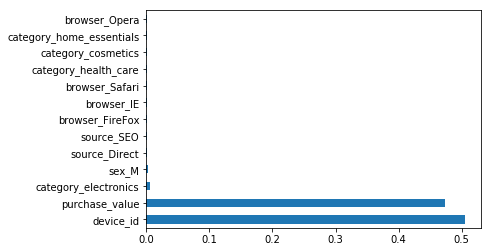

In [32]:
fet_import=pd.Series(model.feature_importances_,index=x.columns)
fet_import.nlargest(20).plot(kind='barh')
plt.show()

In [33]:
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.feature_selection import chi2
ordered_rank_features=SelectKBest(score_func=chi2,k=10)
ordered_feature=ordered_rank_features.fit(x,y)
dfscores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
dfcolumns=pd.DataFrame(x.columns)
features_rank=pd.concat([dfcolumns,dfscores],axis=1,sort=True)
features_rank.columns=['Features','Score']
features_rank

,Features,Score
0,purchase_value,31216.898552
1,device_id,228777.491019
2,source_Direct,48.261738
3,source_SEO,10.329287
4,browser_FireFox,0.410664
5,browser_IE,17.870232
6,browser_Opera,1.421351
7,browser_Safari,3.429137
8,sex_M,3.909215
9,category_cosmetics,56.295283


> Split the data in training and testing

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

> Build a simple decision tree with max_depth=5 and identify accuracy and f1 score. Keep this as a bench mark values to explain the improvement post feature engineering 

In [35]:
model_dt=DecisionTreeClassifier(max_depth=5)
model_dt.fit(x_train,y_train)
predict_dt_test=model_dt.predict(x_test)

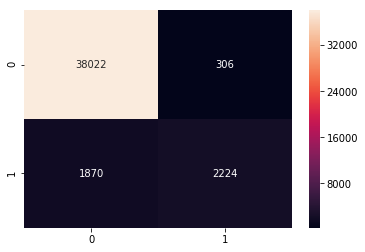

In [36]:
cm1=confusion_matrix(y_test,predict_dt_test)
sns.heatmap(cm1,annot=True,fmt='d')

In [37]:
print(accuracy_score(y_test,predict_dt_test))
print(classification_report(y_test,predict_dt_test))

0.9487058601668945
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     38328
           1       0.88      0.54      0.67      4094

    accuracy                           0.95     42422
   macro avg       0.92      0.77      0.82     42422
weighted avg       0.95      0.95      0.94     42422



In [38]:
dt.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,ip_address,class,category,dob
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,65278,QVPSPJUOCKZAR,SEO,Chrome,M,7.327584e+08,0,home_essentials,22-2-1976
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,96399,EOGFQPIZPYXFZ,Ads,Chrome,F,3.503114e+08,0,apparels,2-1-1962
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,57296,YSSKYOSJHPPLJ,SEO,Opera,M,2.621474e+09,1,electronics,5-3-1962
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,43650,ATGTXKYKUDUQN,SEO,Safari,M,3.840542e+09,0,health_care,3-7-1974
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,45016,NAUITBZFJKHWW,Ads,Safari,M,4.155831e+08,0,home_essentials,25-8-1970


>Using all the date columns, extract the following information wherever necessary <br/>
>Year, month, day, hour, day of the week (mon, tue, etc)


In [39]:
dt['signup_time']=pd.to_datetime(dt['signup_time'])

In [40]:
dt['purchase_time']=pd.to_datetime(dt['purchase_time'])

In [41]:
dt['dob']=pd.to_datetime(dt['dob'])

In [42]:
dt.dtypes

user_id                    int64
signup_time       datetime64[ns]
purchase_time     datetime64[ns]
purchase_value             int64
device_id                 object
source                    object
browser                   object
sex                       object
ip_address               float64
class                      int64
category                  object
dob               datetime64[ns]
dtype: object

In [43]:
dt['Year_Signup']=pd.DatetimeIndex(dt['signup_time']).year
dt['Month_Signup']=pd.DatetimeIndex(dt['signup_time']).month
dt['Day_Signup']=pd.DatetimeIndex(dt['signup_time']).day
dt['Day_Of_week_Signup'] = dt['signup_time'].dt.day_name()
dt['Hour_Signup'] = dt['signup_time'].dt.hour

In [44]:
dt.head(10)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,ip_address,class,category,dob,Year_Signup,Month_Signup,Day_Signup,Day_Of_week_Signup,Hour_Signup
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,65278,QVPSPJUOCKZAR,SEO,Chrome,M,7.327584e+08,0,home_essentials,1976-02-22,2015,2,24,Tuesday,22
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,96399,EOGFQPIZPYXFZ,Ads,Chrome,F,3.503114e+08,0,apparels,1962-02-01,2015,6,7,Sunday,20
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,57296,YSSKYOSJHPPLJ,SEO,Opera,M,2.621474e+09,1,electronics,1962-05-03,2015,1,1,Thursday,18
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,43650,ATGTXKYKUDUQN,SEO,Safari,M,3.840542e+09,0,health_care,1974-03-07,2015,4,28,Tuesday,21
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,45016,NAUITBZFJKHWW,Ads,Safari,M,4.155831e+08,0,home_essentials,1970-08-25,2015,7,21,Tuesday,7
5,159135,2015-05-21 06:03:03,2015-07-09 08:05:14,37124,ALEYXFXINSXLZ,Ads,Chrome,M,2.809315e+09,0,electronics,1997-08-04,2015,5,21,Thursday,6
6,50116,2015-08-01 22:40:52,2015-08-27 03:37:57,75000,IWKVZHJOCLPUR,Ads,Chrome,F,3.987484e+09,0,electronics,1996-01-05,2015,8,1,Saturday,22
7,360585,2015-04-06 07:35:45,2015-05-25 17:21:14,74769,HPUCUYLMJBYFW,Ads,Opera,M,1.692459e+09,0,health_care,1981-11-24,2015,4,6,Monday,7
8,159045,2015-04-21 23:38:34,2015-06-02 14:01:54,66311,ILXYDOZIHOOHT,SEO,IE,F,3.719094e+09,0,apparels,1972-01-22,2015,4,21,Tuesday,23
9,182338,2015-01-25 17:49:49,2015-03-23 23:05:42,37926,NRFFPPHZYFUVC,Ads,IE,M,3.416747e+08,0,apparels,1984-06-02,2015,1,25,Sunday,17


In [45]:
dt['Year_purchase_time']=pd.DatetimeIndex(dt['purchase_time']).year
dt['Month_purchase_time']=pd.DatetimeIndex(dt['purchase_time']).month
dt['Day_purchase_time']=pd.DatetimeIndex(dt['purchase_time']).day
dt['Day_Of_week_purchase_time'] = dt['purchase_time'].dt.day_name()
dt['Hour_purchase_time'] = dt['purchase_time'].dt.hour

In [46]:
dt.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,ip_address,class,...,Year_Signup,Month_Signup,Day_Signup,Day_Of_week_Signup,Hour_Signup,Year_purchase_time,Month_purchase_time,Day_purchase_time,Day_Of_week_purchase_time,Hour_purchase_time
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,65278,QVPSPJUOCKZAR,SEO,Chrome,M,7.327584e+08,0,...,2015,2,24,Tuesday,22,2015,4,18,Saturday,2
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,96399,EOGFQPIZPYXFZ,Ads,Chrome,F,3.503114e+08,0,...,2015,6,7,Sunday,20,2015,6,8,Monday,1
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,57296,YSSKYOSJHPPLJ,SEO,Opera,M,2.621474e+09,1,...,2015,1,1,Thursday,18,2015,1,1,Thursday,18
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,43650,ATGTXKYKUDUQN,SEO,Safari,M,3.840542e+09,0,...,2015,4,28,Tuesday,21,2015,5,4,Monday,13
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,45016,NAUITBZFJKHWW,Ads,Safari,M,4.155831e+08,0,...,2015,7,21,Tuesday,7,2015,9,9,Wednesday,18


In [47]:
dt.dtypes

user_id                               int64
signup_time                  datetime64[ns]
purchase_time                datetime64[ns]
purchase_value                        int64
device_id                            object
source                               object
browser                              object
sex                                  object
ip_address                          float64
class                                 int64
category                             object
dob                          datetime64[ns]
Year_Signup                           int64
Month_Signup                          int64
Day_Signup                            int64
Day_Of_week_Signup                   object
Hour_Signup                           int64
Year_purchase_time                    int64
Month_purchase_time                   int64
Day_purchase_time                     int64
Day_Of_week_purchase_time            object
Hour_purchase_time                    int64
dtype: object

>Using date of birth column, try to calculate the appropriate age of the customer

In [48]:
from datetime import datetime, date

In [49]:
dt["age"] = dt["dob"].apply(lambda x : (pd.datetime.now().year - x.year))

In [50]:
dt.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,ip_address,class,...,Month_Signup,Day_Signup,Day_Of_week_Signup,Hour_Signup,Year_purchase_time,Month_purchase_time,Day_purchase_time,Day_Of_week_purchase_time,Hour_purchase_time,age
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,65278,QVPSPJUOCKZAR,SEO,Chrome,M,7.327584e+08,0,...,2,24,Tuesday,22,2015,4,18,Saturday,2,47
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,96399,EOGFQPIZPYXFZ,Ads,Chrome,F,3.503114e+08,0,...,6,7,Sunday,20,2015,6,8,Monday,1,61
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,57296,YSSKYOSJHPPLJ,SEO,Opera,M,2.621474e+09,1,...,1,1,Thursday,18,2015,1,1,Thursday,18,61
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,43650,ATGTXKYKUDUQN,SEO,Safari,M,3.840542e+09,0,...,4,28,Tuesday,21,2015,5,4,Monday,13,49
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,45016,NAUITBZFJKHWW,Ads,Safari,M,4.155831e+08,0,...,7,21,Tuesday,7,2015,9,9,Wednesday,18,53


> Using age column, identify age buckets using binning method

In [51]:
bins = [0,12,18,59,100]

In [52]:
category = ['Child','Adolescence','Adult','Senior Adult']

In [53]:
dt['Bin_Category'] = pd.cut(dt["age"],bins,labels = category)


In [54]:
dt.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,ip_address,class,...,Day_Signup,Day_Of_week_Signup,Hour_Signup,Year_purchase_time,Month_purchase_time,Day_purchase_time,Day_Of_week_purchase_time,Hour_purchase_time,age,Bin_Category
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,65278,QVPSPJUOCKZAR,SEO,Chrome,M,7.327584e+08,0,...,24,Tuesday,22,2015,4,18,Saturday,2,47,Adult
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,96399,EOGFQPIZPYXFZ,Ads,Chrome,F,3.503114e+08,0,...,7,Sunday,20,2015,6,8,Monday,1,61,Senior Adult
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,57296,YSSKYOSJHPPLJ,SEO,Opera,M,2.621474e+09,1,...,1,Thursday,18,2015,1,1,Thursday,18,61,Senior Adult
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,43650,ATGTXKYKUDUQN,SEO,Safari,M,3.840542e+09,0,...,28,Tuesday,21,2015,5,4,Monday,13,49,Adult
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,45016,NAUITBZFJKHWW,Ads,Safari,M,4.155831e+08,0,...,21,Tuesday,7,2015,9,9,Wednesday,18,53,Adult


>Compute no. of hours/days between purchase time and signup time

In [55]:
#dt['Time_Spent']=(dt.purchase_time - dt.signup_time).dt.total_hour()
dt['Time_Spent_Hours'] = (dt['purchase_time'] - dt['signup_time']) / np.timedelta64(1, 'h')

In [56]:
dt.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,ip_address,class,...,Day_Of_week_Signup,Hour_Signup,Year_purchase_time,Month_purchase_time,Day_purchase_time,Day_Of_week_purchase_time,Hour_purchase_time,age,Bin_Category,Time_Spent_Hours
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,65278,QVPSPJUOCKZAR,SEO,Chrome,M,7.327584e+08,0,...,Tuesday,22,2015,4,18,Saturday,2,47,Adult,1251.856111
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,96399,EOGFQPIZPYXFZ,Ads,Chrome,F,3.503114e+08,0,...,Sunday,20,2015,6,8,Monday,1,61,Senior Adult,4.984444
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,57296,YSSKYOSJHPPLJ,SEO,Opera,M,2.621474e+09,1,...,Thursday,18,2015,1,1,Thursday,18,61,Senior Adult,0.000278
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,43650,ATGTXKYKUDUQN,SEO,Safari,M,3.840542e+09,0,...,Tuesday,21,2015,5,4,Monday,13,49,Adult,136.690278
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,45016,NAUITBZFJKHWW,Ads,Safari,M,4.155831e+08,0,...,Tuesday,7,2015,9,9,Wednesday,18,53,Adult,1211.516944


In [57]:
dt.dtypes

user_id                               int64
signup_time                  datetime64[ns]
purchase_time                datetime64[ns]
purchase_value                        int64
device_id                            object
source                               object
browser                              object
sex                                  object
ip_address                          float64
class                                 int64
category                             object
dob                          datetime64[ns]
Year_Signup                           int64
Month_Signup                          int64
Day_Signup                            int64
Day_Of_week_Signup                   object
Hour_Signup                           int64
Year_purchase_time                    int64
Month_purchase_time                   int64
Day_purchase_time                     int64
Day_Of_week_purchase_time            object
Hour_purchase_time                    int64
age                             

### Model Building

> Convert all the input variables to numeric

In [58]:
dt.drop(['user_id','signup_time','purchase_time','ip_address','dob'],axis=1,inplace=True)

In [59]:
xyz=pd.get_dummies(dt['source'],prefix='source',drop_first=True)
dt=pd.concat([dt,xyz],axis=1)
dt.drop('source',axis=1,inplace=True)
dt.head()

,purchase_value,device_id,browser,sex,class,category,Year_Signup,Month_Signup,Day_Signup,Day_Of_week_Signup,...,Year_purchase_time,Month_purchase_time,Day_purchase_time,Day_Of_week_purchase_time,Hour_purchase_time,age,Bin_Category,Time_Spent_Hours,source_Direct,source_SEO
0,65278,QVPSPJUOCKZAR,Chrome,M,0,home_essentials,2015,2,24,Tuesday,...,2015,4,18,Saturday,2,47,Adult,1251.856111,0,1
1,96399,EOGFQPIZPYXFZ,Chrome,F,0,apparels,2015,6,7,Sunday,...,2015,6,8,Monday,1,61,Senior Adult,4.984444,0,0
2,57296,YSSKYOSJHPPLJ,Opera,M,1,electronics,2015,1,1,Thursday,...,2015,1,1,Thursday,18,61,Senior Adult,0.000278,0,1
3,43650,ATGTXKYKUDUQN,Safari,M,0,health_care,2015,4,28,Tuesday,...,2015,5,4,Monday,13,49,Adult,136.690278,0,1
4,45016,NAUITBZFJKHWW,Safari,M,0,home_essentials,2015,7,21,Tuesday,...,2015,9,9,Wednesday,18,53,Adult,1211.516944,0,0


In [60]:
xyz=pd.get_dummies(dt['browser'],prefix='browser',drop_first=True)
dt=pd.concat([dt,xyz],axis=1)
dt.drop('browser',axis=1,inplace=True)
dt.head()

,purchase_value,device_id,sex,class,category,Year_Signup,Month_Signup,Day_Signup,Day_Of_week_Signup,Hour_Signup,...,Hour_purchase_time,age,Bin_Category,Time_Spent_Hours,source_Direct,source_SEO,browser_FireFox,browser_IE,browser_Opera,browser_Safari
0,65278,QVPSPJUOCKZAR,M,0,home_essentials,2015,2,24,Tuesday,22,...,2,47,Adult,1251.856111,0,1,0,0,0,0
1,96399,EOGFQPIZPYXFZ,F,0,apparels,2015,6,7,Sunday,20,...,1,61,Senior Adult,4.984444,0,0,0,0,0,0
2,57296,YSSKYOSJHPPLJ,M,1,electronics,2015,1,1,Thursday,18,...,18,61,Senior Adult,0.000278,0,1,0,0,1,0
3,43650,ATGTXKYKUDUQN,M,0,health_care,2015,4,28,Tuesday,21,...,13,49,Adult,136.690278,0,1,0,0,0,1
4,45016,NAUITBZFJKHWW,M,0,home_essentials,2015,7,21,Tuesday,7,...,18,53,Adult,1211.516944,0,0,0,0,0,1


In [61]:
xyz=pd.get_dummies(dt['sex'],prefix='sex',drop_first=True)
dt=pd.concat([dt,xyz],axis=1)
dt.drop('sex',axis=1,inplace=True)
dt.head()

,purchase_value,device_id,class,category,Year_Signup,Month_Signup,Day_Signup,Day_Of_week_Signup,Hour_Signup,Year_purchase_time,...,age,Bin_Category,Time_Spent_Hours,source_Direct,source_SEO,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_M
0,65278,QVPSPJUOCKZAR,0,home_essentials,2015,2,24,Tuesday,22,2015,...,47,Adult,1251.856111,0,1,0,0,0,0,1
1,96399,EOGFQPIZPYXFZ,0,apparels,2015,6,7,Sunday,20,2015,...,61,Senior Adult,4.984444,0,0,0,0,0,0,0
2,57296,YSSKYOSJHPPLJ,1,electronics,2015,1,1,Thursday,18,2015,...,61,Senior Adult,0.000278,0,1,0,0,1,0,1
3,43650,ATGTXKYKUDUQN,0,health_care,2015,4,28,Tuesday,21,2015,...,49,Adult,136.690278,0,1,0,0,0,1,1
4,45016,NAUITBZFJKHWW,0,home_essentials,2015,7,21,Tuesday,7,2015,...,53,Adult,1211.516944,0,0,0,0,0,1,1


In [62]:
xyz=pd.get_dummies(dt['category'],prefix='category',drop_first=True)
dt=pd.concat([dt,xyz],axis=1)
dt.drop('category',axis=1,inplace=True)
dt.head()

,purchase_value,device_id,class,Year_Signup,Month_Signup,Day_Signup,Day_Of_week_Signup,Hour_Signup,Year_purchase_time,Month_purchase_time,...,source_SEO,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_M,category_cosmetics,category_electronics,category_health_care,category_home_essentials
0,65278,QVPSPJUOCKZAR,0,2015,2,24,Tuesday,22,2015,4,...,1,0,0,0,0,1,0,0,0,1
1,96399,EOGFQPIZPYXFZ,0,2015,6,7,Sunday,20,2015,6,...,0,0,0,0,0,0,0,0,0,0
2,57296,YSSKYOSJHPPLJ,1,2015,1,1,Thursday,18,2015,1,...,1,0,0,1,0,1,0,1,0,0
3,43650,ATGTXKYKUDUQN,0,2015,4,28,Tuesday,21,2015,5,...,1,0,0,0,1,1,0,0,1,0
4,45016,NAUITBZFJKHWW,0,2015,7,21,Tuesday,7,2015,9,...,0,0,0,0,1,1,0,0,0,1


In [63]:
insured_map=dt['device_id'].value_counts().to_dict()
insured_map
dt['device_id']=dt['device_id'].map(insured_map)
dt.head()

,purchase_value,device_id,class,Year_Signup,Month_Signup,Day_Signup,Day_Of_week_Signup,Hour_Signup,Year_purchase_time,Month_purchase_time,...,source_SEO,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_M,category_cosmetics,category_electronics,category_health_care,category_home_essentials
0,65278,1,0,2015,2,24,Tuesday,22,2015,4,...,1,0,0,0,0,1,0,0,0,1
1,96399,1,0,2015,6,7,Sunday,20,2015,6,...,0,0,0,0,0,0,0,0,0,0
2,57296,12,1,2015,1,1,Thursday,18,2015,1,...,1,0,0,1,0,1,0,1,0,0
3,43650,1,0,2015,4,28,Tuesday,21,2015,5,...,1,0,0,0,1,1,0,0,1,0
4,45016,1,0,2015,7,21,Tuesday,7,2015,9,...,0,0,0,0,1,1,0,0,0,1


In [64]:
obj_col=dt.describe(include='object').columns.values

In [65]:
from sklearn.preprocessing import LabelEncoder
labl=LabelEncoder()
for col in obj_col:
    
    labl.fit(dt[col].append(dt[col]).values)
    dt[col]=labl.transform(dt[col])

> Split the new data in to training and testing

In [66]:
xyz=pd.get_dummies(dt['Bin_Category'],prefix='Bin_Category',drop_first=True)
dt=pd.concat([dt,xyz],axis=1)
dt.drop('Bin_Category',axis=1,inplace=True)
dt.head()

,purchase_value,device_id,class,Year_Signup,Month_Signup,Day_Signup,Day_Of_week_Signup,Hour_Signup,Year_purchase_time,Month_purchase_time,...,browser_Opera,browser_Safari,sex_M,category_cosmetics,category_electronics,category_health_care,category_home_essentials,Bin_Category_Adolescence,Bin_Category_Adult,Bin_Category_Senior Adult
0,65278,1,0,2015,2,24,5,22,2015,4,...,0,0,1,0,0,0,1,0,1,0
1,96399,1,0,2015,6,7,3,20,2015,6,...,0,0,0,0,0,0,0,0,0,1
2,57296,12,1,2015,1,1,4,18,2015,1,...,1,0,1,0,1,0,0,0,0,1
3,43650,1,0,2015,4,28,5,21,2015,5,...,0,1,1,0,0,1,0,0,1,0
4,45016,1,0,2015,7,21,5,7,2015,9,...,0,1,1,0,0,0,1,0,1,0


In [67]:
x=dt.drop('class',axis=1)
y=dt['class']

In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

> Decision Tree

In [69]:
model_dt=DecisionTreeClassifier(max_depth=5)
model_dt.fit(x_train,y_train)
predict_dt_test=model_dt.predict(x_test)

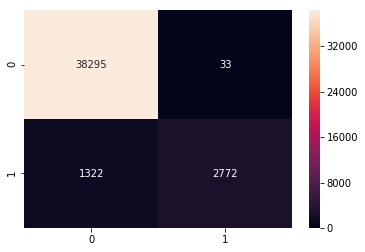

In [70]:
cm1=confusion_matrix(y_test,predict_dt_test)
sns.heatmap(cm1,annot=True,fmt='d')

> f1-score

In [71]:
print(accuracy_score(y_test,predict_dt_test))
print(classification_report(y_test,predict_dt_test))

0.9680590259770874
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     38328
           1       0.99      0.68      0.80      4094

    accuracy                           0.97     42422
   macro avg       0.98      0.84      0.89     42422
weighted avg       0.97      0.97      0.97     42422



> Random Forest

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
model_rand=RandomForestClassifier()
model_rand.fit(x_train,y_train)
model_rand_test=model_rand.predict(x_test)

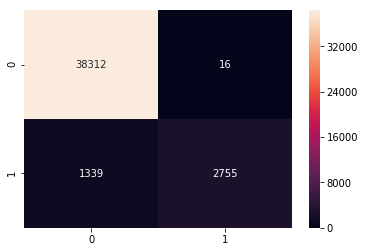

In [74]:
cm1=confusion_matrix(y_test,model_rand_test)
sns.heatmap(cm1,annot=True,fmt='d')

> f1-score

In [75]:
print(accuracy_score(y_test,model_rand_test))
print(classification_report(y_test,model_rand_test))

0.9680590259770874
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     38328
           1       0.99      0.67      0.80      4094

    accuracy                           0.97     42422
   macro avg       0.98      0.84      0.89     42422
weighted avg       0.97      0.97      0.97     42422



> XGBoost

In [76]:
from xgboost import XGBClassifier

In [77]:
model_xgboost=XGBClassifier()
model_xgboost.fit(x_train,y_train)
model_xgboost_test=model_xgboost.predict(x_test)

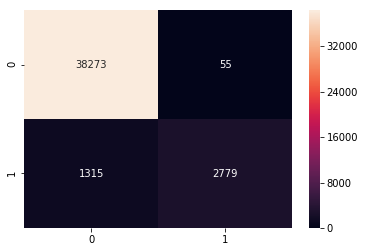

In [78]:
cm1=confusion_matrix(y_test,model_xgboost_test)
sns.heatmap(cm1,annot=True,fmt='d')

> f1-score

In [79]:
print(accuracy_score(y_test,model_xgboost_test))
print(classification_report(y_test,model_xgboost_test))

0.9677054358587526
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     38328
           1       0.98      0.68      0.80      4094

    accuracy                           0.97     42422
   macro avg       0.97      0.84      0.89     42422
weighted avg       0.97      0.97      0.97     42422



> Hyper parameter tuning for Random forest

In [80]:
param_grid=[{'n_estimators':[3,10,30],'max_features':[2,3,4]},
            {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]}
           ]

In [81]:
from sklearn.model_selection import GridSearchCV

In [82]:
grid_RandomForest = GridSearchCV(RandomForestClassifier(),param_grid)

In [83]:
grid_RandomForest.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid=[{'max_features': [2, 3, 4],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}])

In [84]:
grid_RandomForest.best_params_

{'max_features': 4, 'n_estimators': 30}

In [85]:
gridtest_RandomForest_predict = grid_RandomForest.predict(x_test)

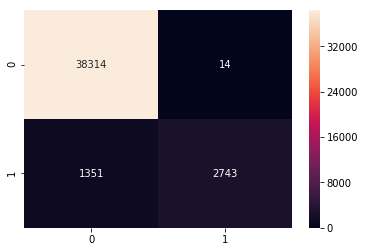

In [86]:
cm1=confusion_matrix(y_test,gridtest_RandomForest_predict)
sns.heatmap(cm1,annot=True,fmt='d')

In [87]:
print(accuracy_score(y_test,gridtest_RandomForest_predict))
print(classification_report(y_test,gridtest_RandomForest_predict))

0.9678232992315308
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     38328
           1       0.99      0.67      0.80      4094

    accuracy                           0.97     42422
   macro avg       0.98      0.83      0.89     42422
weighted avg       0.97      0.97      0.96     42422



> Hyper parameter tuning for Decision Tree

In [88]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [89]:
grid_DecisionTree = GridSearchCV(DecisionTreeClassifier(),params)

In [90]:
grid_DecisionTree.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]})

In [91]:
grid_DecisionTree.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 5}

In [92]:
gridtest_DecisionTree_predict = grid_DecisionTree.predict(x_test)

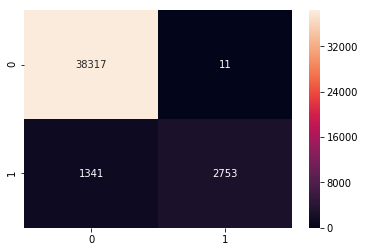

In [93]:
cm1=confusion_matrix(y_test,gridtest_DecisionTree_predict)
sns.heatmap(cm1,annot=True,fmt='d')

In [94]:
print(accuracy_score(y_test,gridtest_DecisionTree_predict))
print(classification_report(y_test,gridtest_DecisionTree_predict))

0.9681297440007544
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     38328
           1       1.00      0.67      0.80      4094

    accuracy                           0.97     42422
   macro avg       0.98      0.84      0.89     42422
weighted avg       0.97      0.97      0.97     42422



> Hyper parameter tuning for XGBoost

In [221]:
params = { 'max_depth': [3,6,10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}

In [225]:
xgbr = XGBClassifier(seed = 20)

In [226]:
clf = GridSearchCV(estimator=xgbr, 
                   param_grid=params,
                    
                   verbose=1)

In [ ]:
clf.fit(x_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


> Also in a single plot, compare the ROC curves for all the above models

In [96]:
from sklearn import metrics

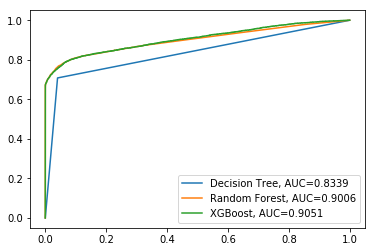

In [99]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict_proba(x_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Decision Tree, AUC="+str(auc))

model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict_proba(x_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc))


model = XGBClassifier()
model.fit(x_train, y_train)
y_pred = model.predict_proba(x_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="XGBoost, AUC="+str(auc))

plt.legend()

#### Inference
> From the above graph I can conclude that XGBoost model is best suited for this datadet

### Customer Segmentation

> In the original feature engineered dataset, exclude the following columns: ids, dates, class (target column)

In [100]:
dt_or=pd.read_csv('Purchase_Fraud_Data.csv')

In [102]:
dt_or.drop(['user_id','signup_time','purchase_time','class'],axis=1,inplace=True)

In [108]:
dt_or.drop(['dob','ip_address'],axis=1,inplace=True)

> Convert all the input variables to numeric

In [103]:
xyz=pd.get_dummies(dt_or['source'],prefix='source',drop_first=True)
dt_or=pd.concat([dt_or,xyz],axis=1)
dt_or.drop('source',axis=1,inplace=True)
dt_or.head()

,purchase_value,device_id,browser,sex,ip_address,category,dob,source_Direct,source_SEO
0,65278,QVPSPJUOCKZAR,Chrome,M,7.327584e+08,home_essentials,22-2-1976,0,1
1,96399,EOGFQPIZPYXFZ,Chrome,F,3.503114e+08,apparels,2-1-1962,0,0
2,57296,YSSKYOSJHPPLJ,Opera,M,2.621474e+09,electronics,5-3-1962,0,1
3,43650,ATGTXKYKUDUQN,Safari,M,3.840542e+09,health_care,3-7-1974,0,1
4,45016,NAUITBZFJKHWW,Safari,M,4.155831e+08,home_essentials,25-8-1970,0,0


In [104]:
xyz=pd.get_dummies(dt_or['browser'],prefix='browser',drop_first=True)
dt_or=pd.concat([dt_or,xyz],axis=1)
dt_or.drop('browser',axis=1,inplace=True)
dt_or.head()

,purchase_value,device_id,sex,ip_address,category,dob,source_Direct,source_SEO,browser_FireFox,browser_IE,browser_Opera,browser_Safari
0,65278,QVPSPJUOCKZAR,M,7.327584e+08,home_essentials,22-2-1976,0,1,0,0,0,0
1,96399,EOGFQPIZPYXFZ,F,3.503114e+08,apparels,2-1-1962,0,0,0,0,0,0
2,57296,YSSKYOSJHPPLJ,M,2.621474e+09,electronics,5-3-1962,0,1,0,0,1,0
3,43650,ATGTXKYKUDUQN,M,3.840542e+09,health_care,3-7-1974,0,1,0,0,0,1
4,45016,NAUITBZFJKHWW,M,4.155831e+08,home_essentials,25-8-1970,0,0,0,0,0,1


In [105]:
xyz=pd.get_dummies(dt_or['sex'],prefix='sex',drop_first=True)
dt_or=pd.concat([dt_or,xyz],axis=1)
dt_or.drop('sex',axis=1,inplace=True)
dt_or.head()

,purchase_value,device_id,ip_address,category,dob,source_Direct,source_SEO,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_M
0,65278,QVPSPJUOCKZAR,7.327584e+08,home_essentials,22-2-1976,0,1,0,0,0,0,1
1,96399,EOGFQPIZPYXFZ,3.503114e+08,apparels,2-1-1962,0,0,0,0,0,0,0
2,57296,YSSKYOSJHPPLJ,2.621474e+09,electronics,5-3-1962,0,1,0,0,1,0,1
3,43650,ATGTXKYKUDUQN,3.840542e+09,health_care,3-7-1974,0,1,0,0,0,1,1
4,45016,NAUITBZFJKHWW,4.155831e+08,home_essentials,25-8-1970,0,0,0,0,0,1,1


In [106]:
xyz=pd.get_dummies(dt_or['category'],prefix='category',drop_first=True)
dt_or=pd.concat([dt_or,xyz],axis=1)
dt_or.drop('category',axis=1,inplace=True)
dt_or.head()

,purchase_value,device_id,ip_address,dob,source_Direct,source_SEO,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_M,category_cosmetics,category_electronics,category_health_care,category_home_essentials
0,65278,QVPSPJUOCKZAR,7.327584e+08,22-2-1976,0,1,0,0,0,0,1,0,0,0,1
1,96399,EOGFQPIZPYXFZ,3.503114e+08,2-1-1962,0,0,0,0,0,0,0,0,0,0,0
2,57296,YSSKYOSJHPPLJ,2.621474e+09,5-3-1962,0,1,0,0,1,0,1,0,1,0,0
3,43650,ATGTXKYKUDUQN,3.840542e+09,3-7-1974,0,1,0,0,0,1,1,0,0,1,0
4,45016,NAUITBZFJKHWW,4.155831e+08,25-8-1970,0,0,0,0,0,1,1,0,0,0,1


In [107]:
insured_map=dt_or['device_id'].value_counts().to_dict()
insured_map
dt_or['device_id']=dt_or['device_id'].map(insured_map)
dt_or.head()

,purchase_value,device_id,ip_address,dob,source_Direct,source_SEO,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_M,category_cosmetics,category_electronics,category_health_care,category_home_essentials
0,65278,1,7.327584e+08,22-2-1976,0,1,0,0,0,0,1,0,0,0,1
1,96399,1,3.503114e+08,2-1-1962,0,0,0,0,0,0,0,0,0,0,0
2,57296,12,2.621474e+09,5-3-1962,0,1,0,0,1,0,1,0,1,0,0
3,43650,1,3.840542e+09,3-7-1974,0,1,0,0,0,1,1,0,0,1,0
4,45016,1,4.155831e+08,25-8-1970,0,0,0,0,0,1,1,0,0,0,1


> Using Elbow method identify optimal number of clusters required to group customers in to various clusters

In [109]:
dt_or.head()

,purchase_value,device_id,source_Direct,source_SEO,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_M,category_cosmetics,category_electronics,category_health_care,category_home_essentials
0,65278,1,0,1,0,0,0,0,1,0,0,0,1
1,96399,1,0,0,0,0,0,0,0,0,0,0,0
2,57296,12,0,1,0,0,1,0,1,0,1,0,0
3,43650,1,0,1,0,0,0,1,1,0,0,1,0
4,45016,1,0,0,0,0,0,1,1,0,0,0,1


In [133]:
from sklearn.preprocessing import StandardScaler

In [134]:
scaled_dt = StandardScaler().fit_transform(dt_or)

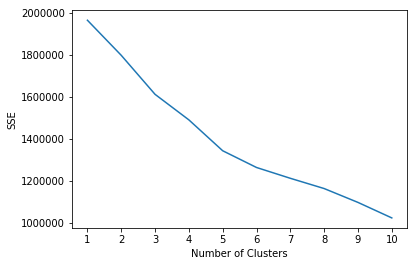

In [135]:
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}


sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_dt)
    sse.append(kmeans.inertia_)


plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

> Perform K-Means clustering using appropriate number of clusters

In [136]:
kmeans = KMeans(init="random", n_clusters=5, n_init=10, random_state=1)

#fit k-means algorithm to data
kmeans.fit(scaled_dt)

#view cluster assignments for each observation
kmeans.labels_

array([4, 3, 0, ..., 1, 2, 3])

> Tag each customer with a cluster

In [137]:
dt_or['cluster'] = kmeans.labels_

In [138]:
dt_or.head(10)

,purchase_value,device_id,source_Direct,source_SEO,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_M,category_cosmetics,category_electronics,category_health_care,category_home_essentials,cluster
0,65278,1,0,1,0,0,0,0,1,0,0,0,1,4
1,96399,1,0,0,0,0,0,0,0,0,0,0,0,3
2,57296,12,0,1,0,0,1,0,1,0,1,0,0,0
3,43650,1,0,1,0,0,0,1,1,0,0,1,0,1
4,45016,1,0,0,0,0,0,1,1,0,0,0,1,4
5,37124,1,0,0,0,0,0,0,1,0,1,0,0,2
6,75000,1,0,0,0,0,0,0,0,0,1,0,0,2
7,74769,1,0,0,0,0,1,0,1,0,0,1,0,1
8,66311,1,0,1,0,1,0,0,0,0,0,0,0,3
9,37926,1,0,0,0,1,0,0,1,0,0,0,0,3
